# 1. Install Required Libraries



In [5]:
!pip install pandas numpy nltk textblob matplotlib seaborn

# 2. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Download NLTK Data

#### If you're using NLTK for text preprocessing, download the required datasets:

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 4. Load Data

### Load your dataset into a Pandas DataFrame.

In [8]:
# Load data from a CSV file
df = pd.read_csv('/Users/rajanandinialla/Downloads/twitter_training.csv')

# Display the first few rows
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                           Tweettext  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


# 5. Basic Exploration


 Perform some basic exploration to understand the dataset.
 

### Check for Missing Values

In [9]:
print(df.isnull().sum())

 ID            0
Topic          0
Sentiment      0
Tweettext    686
dtype: int64


### Summary Statistics

In [10]:
print(df['Sentiment'].value_counts())

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64


### Unique Topics

In [11]:
print(f"Unique topics: {df['Topic'].unique()}")

Unique topics: ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


# 5. Analyze Sentiment Distribution

### Analyze the distribution of sentiments in the dataset.

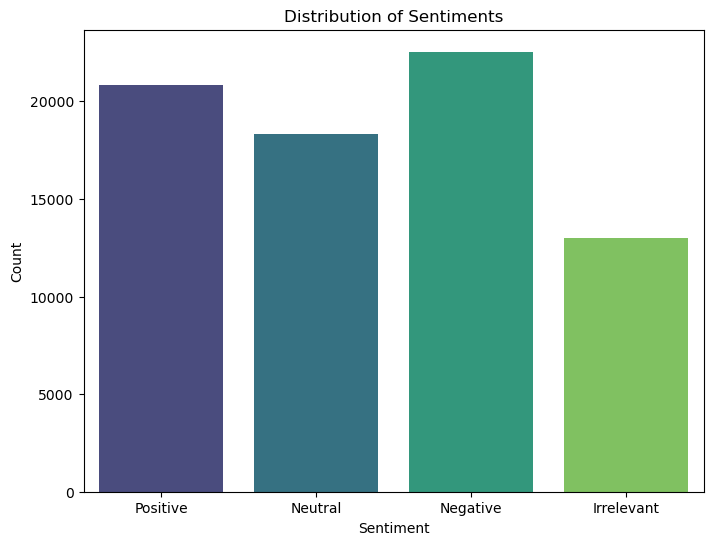

In [12]:

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 6. Preprocess Tweet Text

In [7]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
import nltk

# Download punkt for tokenization
nltk.download('punkt')

# Download stopwords for removing common words
nltk.download('stopwords')

# (Optional) Download wordnet for lemmatization
nltk.download('wordnet')

# (Optional) Download averaged_perceptron_tagger for POS tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rajanandinialla/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
# Check if punkt is installed
print("Punkt installed:", nltk.data.find('tokenizers/punkt'))

# Check if stopwords is installed
print("Stopwords installed:", nltk.data.find('corpora/stopwords'))

Punkt installed: /Users/rajanandinialla/nltk_data/tokenizers/punkt
Stopwords installed: /Users/rajanandinialla/nltk_data/corpora/stopwords


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Example text
text = "This is a test sentence for sentiment analysis."

# Tokenize the text
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Filtered Tokens:", filtered_tokens)

# Handle Missing Values

In [18]:
# Check for missing values
print(df['Tweettext'].isnull().sum())

# Check the data types
print(df['Tweettext'].apply(type).value_counts())

0
<class 'str'>    73996
Name: Tweettext, dtype: int64


In [19]:
df = df.dropna(subset=['Tweettext'])

In [20]:
df['Tweettext'] = df['Tweettext'].fillna('')

### Clean and preprocess the tweet text for further analysis.

In [15]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        return ''
    
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [17]:
df['Cleanedtext'] = df['Tweettext'].apply(preprocess_text)

# Display the cleaned text
print(df[['Tweettext', 'Cleanedtext']].head())

                                           Tweettext  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                       Cleanedtext  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  


# Perform Sentiment Analysis

## Calculate Sentiment Scores


In [36]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Cleanedtext'].apply(get_sentiment)
print(df[['Cleanedtext', 'Sentiment']].head())
print(df[['Cleanedtext', 'Sentiment']].tail())

                       Cleanedtext  Sentiment
0    im getting borderlands murder        0.0
1              coming borders kill        0.0
2      im getting borderlands kill        0.0
3     im coming borderlands murder        0.0
4  im getting borderlands 2 murder        0.0
                                             Cleanedtext  Sentiment
74677  realized windows partition mac like 6 years be...       -0.4
74678  realized mac window partition 6 years behind n...       -0.4
74679  realized windows partition mac 6 years behind ...       -0.4
74680  realized windows partition mac like 6 years be...       -0.5
74681  like windows partition mac like 6 years behind...       -0.4


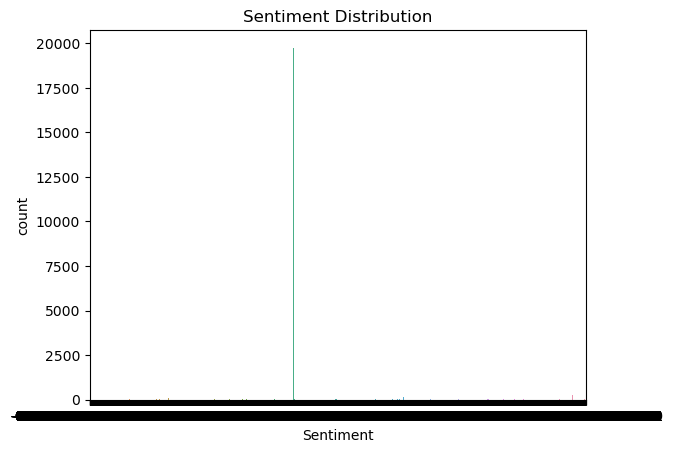

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Use VADER for Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is better suited for analyzing sentiment in social media text, as it handles slang, emoticons, and informal language well.

In [24]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00


## Apply VADER Sentiment Analysis

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score using VADER
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply VADER sentiment analysis
df['Sentiment'] = df['Cleanedtext'].apply(get_vader_sentiment)

# Display the updated DataFrame
print(df[['Cleanedtext', 'Sentiment']].tail())

                                             Cleanedtext  Sentiment
74677  realized windows partition mac like 6 years be...     0.3612
74678  realized mac window partition 6 years behind n...     0.0000
74679  realized windows partition mac 6 years behind ...     0.0000
74680  realized windows partition mac like 6 years be...     0.3612
74681  like windows partition mac like 6 years behind...     0.6124


## Categorize Sentiment

In [26]:
# Function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

# Display the updated DataFrame
print(df[['Cleanedtext', 'Sentiment', 'SentimentCategory']].head())

                       Cleanedtext  Sentiment SentimentCategory
0    im getting borderlands murder    -0.6908          Negative
1              coming borders kill    -0.6908          Negative
2      im getting borderlands kill    -0.6908          Negative
3     im coming borderlands murder    -0.6908          Negative
4  im getting borderlands 2 murder    -0.6908          Negative


In [27]:
# Display the last 5 rows of the 'Cleanedtext' column
print(df['Cleanedtext'].tail())

74677    realized windows partition mac like 6 years be...
74678    realized mac window partition 6 years behind n...
74679    realized windows partition mac 6 years behind ...
74680    realized windows partition mac like 6 years be...
74681    like windows partition mac like 6 years behind...
Name: Cleanedtext, dtype: object


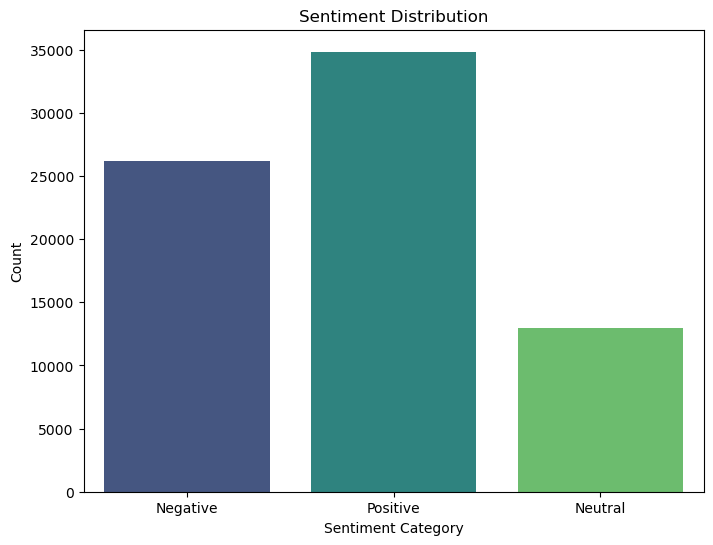

In [29]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Save the results
df.to_csv('sentiment_analysis_results.csv', index=False)

In [33]:
df.to_csv('final_sentiment_analysis_results.csv', index=False)